# Homework 12: Brownian motion, diffusion and sampling with random walks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Brownian motion and Diffusion

In lecture 11, you saw dynamics of the form
$$
x(t+\tau)=x(t)+\Delta
$$
with $\Delta$ drawn i.i.d. at each time step from a given distribution. This dynamics gives rise to the diffusion equation
$$
\frac{\partial \rho}{\partial t}(x,t)=D \frac{\partial^2\rho}{\partial x^2}(x,t)\,\text{with}\,\, D=\frac{\text{Var}(\Delta)}{2\tau}.
$$
In this exercise, we will find a numerical solution to the diffusion equation by estimating $\rho$ from random walks.

**1.1** Consider a particle in 1 dimension. Set $\tau=1$, the discrete dynamics of the particle is then given by
$$
x(t+1)=x(t)+\Delta.
$$
Suppose that $\Delta=\pm 1$ with equal probability and independent of the time. Code a function that performs this random walk and returns an array of the position of a particle after each timestep for a maximum of  $T=1000$ timesteps. Initialize the position at $x(t=0)=0$. Repeat the experiment 3-5 times and plot the obtained trajectories on a graph with the time on the x-axis and the position on the y-axis.

Hint: To generate $\Delta$ you can define a random number generator using for instance `rng = np.random.default_rng()` and then use the function `rng.choice`.

In [2]:
# Your solution here:

In [3]:
# Solution
rng = np.random.default_rng()

In [4]:
def random_walk(T=1000, pos_init=0):
    positions=np.zeros(T)
    for t in range(T-1):
        positions[t+1]=positions[t]+rng.choice([-1,1])
    return positions

In [5]:
walkers=[]
for _ in range(3):
    walkers.append(random_walk())

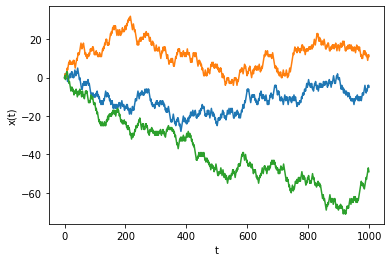

In [6]:
for walker in walkers:
    plt.plot(walker)
plt.xlabel('t')
plt.ylabel('x(t)');

**1.2** Do the same but now $\Delta$ is sampled from a gaussian with mean $0$ and standard deviation $1$. Compare qualitatively to the previous random walk: do the figures look the same ?

In [7]:
# Your solution here:

In [8]:
# Solution
def random_walk_gaussian(T=1000, pos_init=0):
    positions=np.zeros(T)
    for t in range(T-1):
        positions[t+1]=positions[t]+rng.normal()
    return positions

In [9]:
walkers=[]
for _ in range(3):
    walkers.append(random_walk_gaussian())

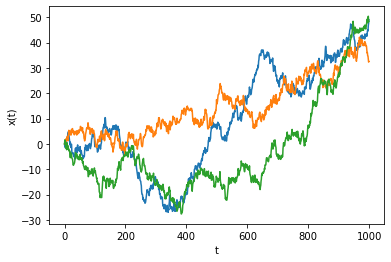

In [10]:
for walker in walkers:
    plt.plot(walker)
plt.xlabel('t')
plt.ylabel('x(t)');

In the gaussian random walk the accessible space is of course not discretized as in the previous case, but the qualitative behavior is similar.

**1.3** We now want to sample the distribution $\rho$ with $N$ particles. Code a function that returns an array of size $N\times T$ representing the position of the $N$ particles after each timestep. $N$ and $T$ should be inputs of the function. $\Delta$ should be sampled from a uniform distribution between $-1$ and $1$. Initialize the position of each particle at $x=0$.

In [11]:
# Your solution here:

In [12]:
def multiple_random_walks_uniform(N=10000, T=100):
    positions=np.zeros((N,T))
    for t in range(T-1):
        positions[:,t+1]=positions[:,t]+rng.uniform(-1,1,size=N)
    return positions

**1.4** Using your previously defined function, plot the distribution of the positions for $N=10000$ particles using `plt.histogram` $-10$ and $10$ for $t=1,2,5,10$. Do a different figure for each value of $t$. Fix the y-axis so that you can compare the different figures. Additionnaly, plot the analytical solution of the diffusion equation 
$$
\rho(x,t)=\frac{1}{\sqrt{4 \pi D t}}\text{exp}(-\frac{x^2}{4Dt}), \,D=\frac{\text{Var}(\Delta)}{2\tau}
$$
on top of the histograms. Recall that in our case $\tau=1$.

Hint: The variance for the uniform distribution between $-1$ and $1$ is $1/3$.

In [13]:
# Your solution here:

In [14]:
# Solution
def rho(x,t, sigma):
    D = sigma**2/2
    return 1/np.sqrt(4*np.pi*D*t)*np.exp(-x**2/(4*D*t))

In [15]:
sigma=np.sqrt(1/3) # The standard deviation of the uniform distribution
positions=multiple_random_walks_uniform()

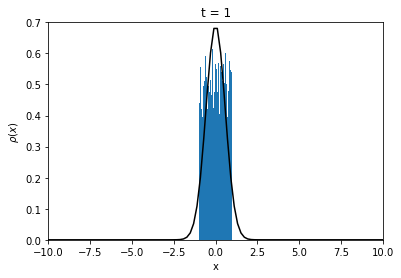

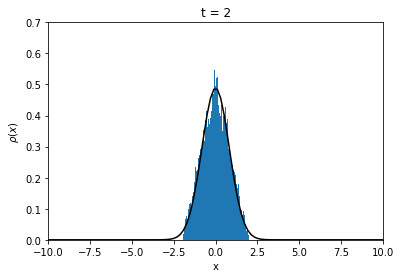

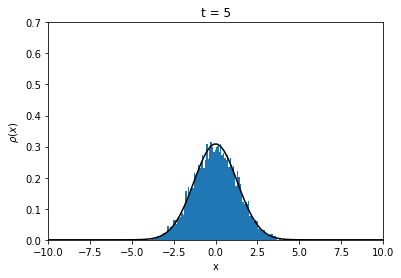

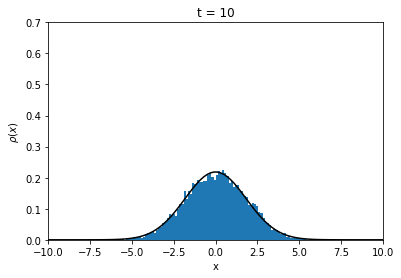

In [16]:
t=1
for t in [1,2,5,10]:
    plt.hist(positions[:,t], bins=100,density=True)
    plt.plot(np.linspace(-10,10,100), rho(np.linspace(-10,10,100),t,sigma), color='k')
    plt.xlim(-10,10)
    plt.ylim(0,0.7)
    plt.title('t = '+str(t))
    plt.xlabel('x')
    plt.ylabel(r'$\rho(x)$')
    plt.show()

**1.5** Plot the empirical standard deviation of the positions of the particles as a function of time for $T=100$ in a log-log scale. Also plot the standard deviation $\sqrt{2Dt}$ from the analytical solution, and check that they are the same.

In [17]:
# Your solution here:

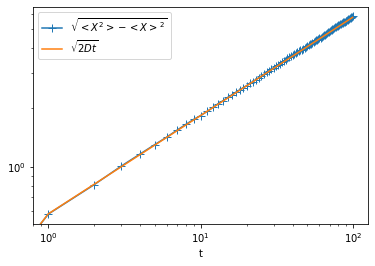

In [18]:
plt.loglog(np.arange(0, 100), np.std(positions, axis=0), label='$\sqrt{<X^2>-<X>^2}$', marker='+', markersize=8)
plt.loglog(np.arange(0, 100), np.sqrt(sigma**2*np.arange(0, 100)), label='$\sqrt{2Dt}$')
plt.xlabel('t')
plt.legend();

**1.6** Repeat 1.4 and 1.5 but this time with $\Delta=\pm 1$ with equal probability. Be careful when choosing the bins and weights of the histogram to take into account the discrete space of the problem. Also plot the result for $t=99$ (adapt the xlim if needed).

In [19]:
# Your solution here:

In [20]:
def multiple_random_walks_binary(N=10000, T=100):
    positions=np.zeros((N,T))
    for t in range(T-1):
        positions[:,t+1]=positions[:,t]+rng.choice([-1,1], size=N)
    return positions

In [21]:
# Solution
sigma=1 # The standard deviation of the uniform distribution
positions=multiple_random_walks_binary()

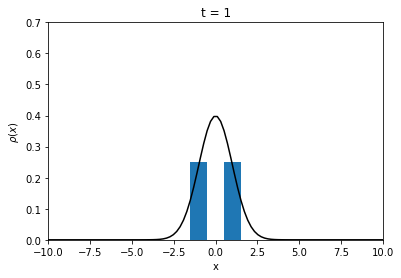

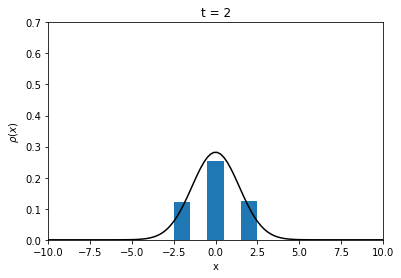

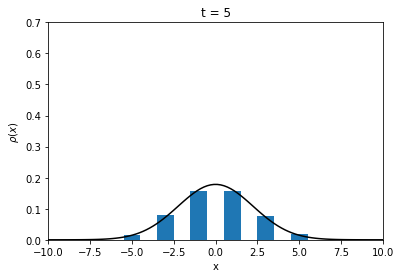

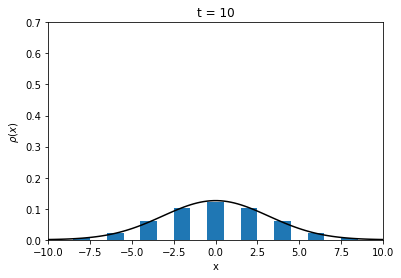

In [22]:
t=1
for t in [1,2,5,10]:
    plt.hist(positions[:,t], bins=np.arange(-10.5,10.5,1), weights=np.ones(10000)/20000, align='mid') 
    plt.plot(np.linspace(-10,10,100), rho(np.linspace(-10,10,100),t,sigma), color='k')
    plt.xlim(-10,10)
    plt.ylim(0,0.7)
    plt.title('t = '+str(t))
    plt.xlabel('x')
    plt.ylabel(r'$\rho(x)$')
    plt.show()

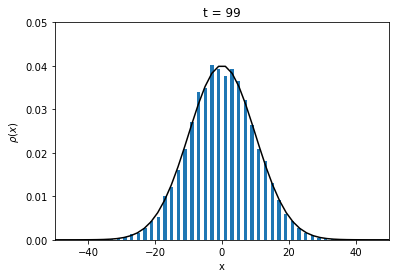

In [23]:
t=1
for t in [99]:
    plt.hist(positions[:,t], bins=np.arange(-100.5,100.5,1), weights=np.ones(10000)/20000, align='mid') 
    plt.plot(np.linspace(-100,100,100), rho(np.linspace(-100,100,100),t,sigma), color='k')
    plt.xlim(-50,50)
    plt.ylim(0,0.05)
    plt.title('t = '+str(t))
    plt.xlabel('x')
    plt.ylabel(r'$\rho(x)$')
    plt.show()

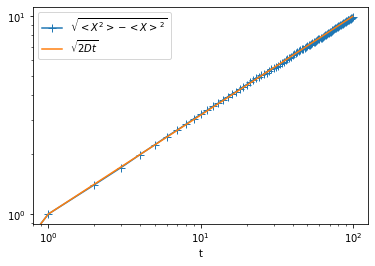

In [24]:
plt.loglog(np.arange(0, 100), np.std(positions, axis=0), label='$\sqrt{<X^2>-<X>^2}$', marker='+', markersize=8)
plt.loglog(np.arange(0, 100), np.sqrt(sigma**2*np.arange(0, 100)), label='$\sqrt{2Dt}$')
plt.xlabel('t')
plt.legend();

# Exercise 2: Curse of dimensionality

In this exercise, we present the curse of dimensionality with a simple example.

**2.1** Consider a hypercube with side of lengh $0.9$ and a hypercube with side of length $1$. What is the ratio of the volume of the small hypercube compared to the large hypercube for $d=1,2,5,10, 50$ ?

In [25]:
# Your solution here:

In [26]:
# Solution
def ratio(d):
    return 0.9**d
d=np.array([1,2,5,10,50])
print(np.round(ratio(d),3))

[0.9   0.81  0.59  0.349 0.005]


# Exercise 3: Estimating $\pi$ by sampling the square with Markov chains.

In exercise 8 you estimated $\pi$ by sampling points uniformly on the square and counting the number of points that fell in a circle. In this exercise, we will solve the same problem using Markov chains.

**3.1** We want to sample points uniformly on a square to estimate $\pi$ by using the ratio of points inside and outside the unit circle. We will first try to solve this problem the **wrong way**, but perhaps more intuitive way. We use a Markov chain to sample the points. The chain $(\mathbf{x}(t=0), \mathbf{x}(t=1), ..., \mathbf{x}(t=T))$ has the following behavior:
1. Initialize the position of the walker in $\mathbf{x}(t=0)=(1,1)$.
2. Draw a step $\mathbf{\Delta} =(\Delta_x , \Delta_y )$ from a given distribution.
   - If the step brings the walker outside of the square, resample $\mathbf{\Delta} =(\Delta_x , \Delta_y )$ and repeat from step 2.
   - Otherwise, the walker moves and the new position is $\mathbf{x}(t+1)=\mathbf{x}(t)+\mathbf{\Delta}$
3. Sample the point $\mathbf{x}(t+1)$ **(i.e. we sample only when the walker moved)**.
4. Repeat from step 2 until $T$ is reached.
   
Implement this algorithm with $\Delta_x$ and $\Delta_y$ sampled uniformly between $-0.1$ and $0.1$. The algorithm should output the chain as a $(T+1)\times 2$ array and the total number of points $N_{in}$ inside the unit circle until $t$ as an array of size $T$.


In [27]:
# Your solution here:

In [28]:
def markov_pi_wrong(T=100000, delta=0.1):
    N_hits=0
    N_hits_array=np.zeros(T)
    pos=np.zeros((T+1,2))
    x=1
    y=1
    pos[0,0]=x
    pos[0,1]=y
    for t in range(T):
        moved=False
        while not moved:
            Dx=np.random.uniform(-delta, delta)
            Dy=np.random.uniform(-delta, delta)
            if np.abs(x+Dx)<1 and np.abs(y+Dy)<1:
                moved=True
                x+=Dx
                y+=Dy
                if x**2+y**2<1:
                    N_hits+=1
            pos[t+1,:]=np.array([x,y])
        N_hits_array[t]=N_hits

    return pos, N_hits_array

**3.2** Simulate $3$ chains with $T=10^5$ and plot your estimation of $\pi$ after each step for each of the $3$ chains. The estimation of $\pi$ after $t$ steps is given by
\begin{equation}
    \pi (t) \approx \frac{4 N_{in}}{t}.
\end{equation}
Also draw a line where the real value of $\pi$ is. Do you find the correct value of $\pi$ ?

In [52]:
# Your solution here:

In [29]:
# Solution
T=100000
_, N_hits_array=markov_pi_wrong(T=T)
_, N_hits_array2=markov_pi_wrong(T=T)
_, N_hits_array3=markov_pi_wrong(T=T)

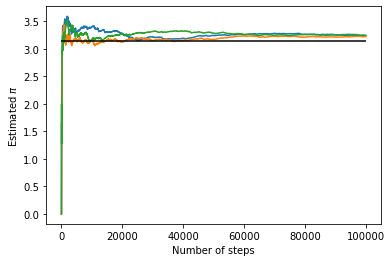

In [30]:
plt.plot(np.arange(1,T+1),N_hits_array*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array2*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array3*4/np.arange(1,T+1))
plt.xlabel('Number of steps')
plt.ylabel('Estimated $\pi$')
plt.hlines(np.pi,0, T, color='k');

We don't seem to find the correct value of $\pi$.

**3.3** We will now do it the **correct way**. Consider the following algorithm, which is the same as before except for the fact that we sample the point whether the walker moved or not:
1. Initialize the position of the walker in $\mathbf{x}(t=0)=(1,1)$.
2. Draw a step $\mathbf{\Delta} =(\Delta_x , \Delta_y )$ from a given distribution.
   - If the step brings the walker outside of the square, the walker doesn't move: $\mathbf{x}(t+1)=\mathbf{x}(t)$.
   - Otherwise, the walker moves and the new position is $\mathbf{x}(t+1)=\mathbf{x}(t)+\mathbf{\Delta}$
3. Sample the point $\mathbf{x}(t+1)$ **whether the walker moved or not**.
4. Repeat from step 2 until $T$ is reached.
   
Implement this algorithm with $\Delta_x$ and $\Delta_y$ sampled uniformly between $-0.1$ and $0.1$. The algorithm should output the chain as a $(T+1)\times 2$ array and the total number of points inside the circle until $t$ as an array of size $T$. Additionnaly, your function should also output an array of length $T$ containing $1$ or $0$ if the walker is inside or outside the circle at time $t$ (this will be useful for the rest of the exercise).


In [31]:
# Your solution here

In [32]:
# Solution
def markov_pi(T=100000, delta_x=0.1, delta_y=0.1, pos_init=np.array([1.,1])):
    N_hits=0
    N_hits_array=np.zeros(T)
    hit_array=np.zeros(T)
    pos=np.zeros((T+1,2))
    pos[0]=pos_init
    x=pos_init[0]
    y=pos_init[1]
    for t in range(T):
        Dx=rng.uniform(-delta_x, delta_x)
        Dy=rng.uniform(-delta_y, delta_y)
        if np.abs(x+Dx)<1 and np.abs(y+Dy)<1:
            x+=Dx
            y+=Dy
        if x**2+y**2<1:
            N_hits+=1
            hit_array[t]=1
        pos[t+1,:]=np.array([x,y])
        N_hits_array[t]=N_hits

    return pos, N_hits_array, hit_array

**3.4** Apply your algorithm for $T=300$ steps and plot the obtained random walk. Set the aspect ratio to 'equal' to have a better visualization, and optionnaly also plot the unit circle.

In [33]:
# Your solution here:

In [34]:
# Solution
pos, _, _=markov_pi(T=300, delta_x=0.1, delta_y=0.1)

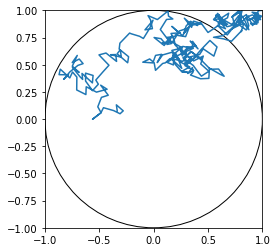

In [35]:
plt.plot(pos[:,0], pos[:,1])
plt.gca().add_patch(plt.Circle((0,0),1, color='k', fill=False))
ax=plt.gca()
ax.set_aspect('equal')
plt.xlim(-1,1)
plt.ylim(-1,1);

**3.5** Repeat 3.2 with the new algorithm. This time it should converge to $\pi$.

In [36]:
# Your solution here:

In [37]:
# Solution
T=100000
pos, N_hits_array,_=markov_pi(T=T)
pos, N_hits_array2,_=markov_pi(T=T)
pos, N_hits_array3,_=markov_pi(T=T)

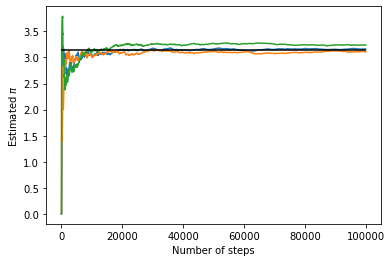

In [38]:
plt.plot(np.arange(1,T+1),N_hits_array*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array2*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array3*4/np.arange(1,T+1))
plt.xlabel('Number of steps')
plt.ylabel('Estimated $\pi$')
plt.hlines(np.pi,0, T, color='k');

**3.6** Do the same but this time sample $\Delta_y$ from a uniform distribution between $-1$ and $1$ (while keeping $\Delta_x$ uniform between $-0.1$ and $0.1$). Do you still converge to $\pi$ ?

In [39]:
# Your solution here:

In [40]:
# Solution:
T=100000
pos, N_hits_array,_=markov_pi(T=T, delta_y=1)
pos, N_hits_array2,_=markov_pi(T=T, delta_y=1)
pos, N_hits_array3,_=markov_pi(T=T, delta_y=1)

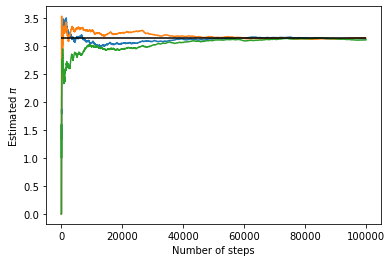

In [41]:
plt.plot(np.arange(1,T+1),N_hits_array*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array2*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array3*4/np.arange(1,T+1))
plt.xlabel('Number of steps')
plt.ylabel('Estimated $\pi$')
plt.hlines(np.pi,0, T, color='k');

We still converge to $\pi$.

**3.7** We now discuss how to estimate the error on the value of $\pi$. Consider again that $\Delta_x$ and $\Delta_y$ are sampled uniformly between $-0.1$ and $0.1$. Run a markov chain of length $T=10^5$ steps. Suppose that each point of the random walk is sampled i.i.d uniformly on the square. Give the obtained value of $\pi$ and its error. Recall that you can estimate the error using $\frac{1}{\sqrt{T}} s$ where $s^2$ is the unbiased empirical estimator of the  variance (see ex. 1.1 of homework 9 if you have doubts on how to compute the error). Alternatively you can also use the obtained variance from section 8.2 of the lecture notes. Is the true value of $\pi$ inside the error estimate ? Is the obtained error reasonable to you ?

In [48]:
# Your solution here:

In [49]:
# Solution:
T=100000
_, N_hits_array,hit_array=markov_pi(T=T, delta_x=0.1, delta_y=0.1)
pi=N_hits_array[-1]*4/T
error=4*np.std(hit_array,ddof=1)/np.sqrt(T)
print(f'pi = {pi:.4f} +- {error:.4f}')
if pi-error<np.pi<pi+error:
    print('True value of pi is within the error bars.')
else:
    print('True value of pi is not within the error bars.')

pi = 3.1159 +- 0.0052
True value of pi is not within the error bars.


The way we estimate the error is not correct since we cannot consider the samples as independent. Our estimation of the error is too small.

**3.8** We can obtain a better estimation of the error on $\pi$ by running multiple Markov chains and computing an estimation of $\pi$ for each of them. If the chains are long enough, then the obtained values for the different chains are i.i.d. Compute the mean value of $\pi$ after $T=10^4$ steps for $k=10$ runs and its error. We now compute the error as $\frac{1}{\sqrt{k}} s$ where $s^2$ is the unbiased empirical estimator of the  variance of our $k$ values of $\pi$. 

Remark: In general, we should wait until the random walk have decorrelated from their initial position. This was not discussed here for simplicity.

In [50]:
# Your solution here:

In [51]:
# Solution:
pis=[]
k=10
T=10000
for _ in range(k):
    _, N_hits_array,_=markov_pi(T=T, delta_x=0.1, delta_y=0.1)
    pis.append(N_hits_array[-1]*4/T)
mean_pi=np.mean(pis)
error=np.std(pis,ddof=1)/np.sqrt(k)
print(f'pi = {mean_pi:.4f} +- {error:.4f}')
if mean_pi-error<np.pi<mean_pi+error:
    print('True value of pi is within the error bars.')
else:
    print('True value of pi is not within the error bars.')

pi = 3.1705 +- 0.0353
True value of pi is within the error bars.
